In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df['InternetService']=df['InternetService'].fillna("")

In [7]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_columns_data=df.select_dtypes(include=['number'])

In [13]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [14]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


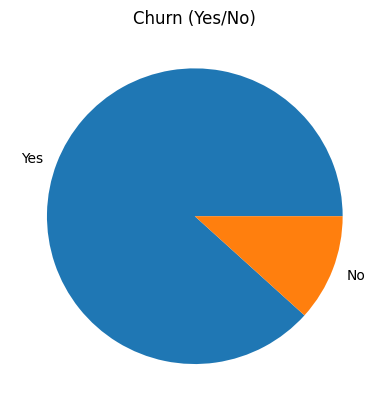

In [15]:
df["Churn"].value_counts().plot(kind='pie')
plt.title('Churn (Yes/No)')
plt.ylabel('')
plt.show()

In [16]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [19]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

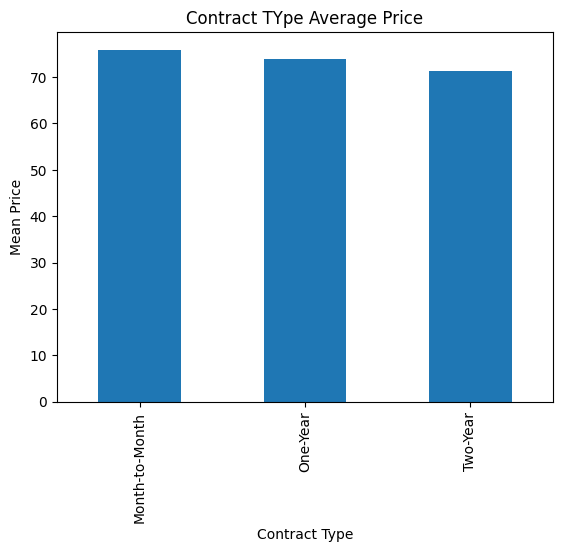

In [20]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract TYpe Average Price")
plt.show()

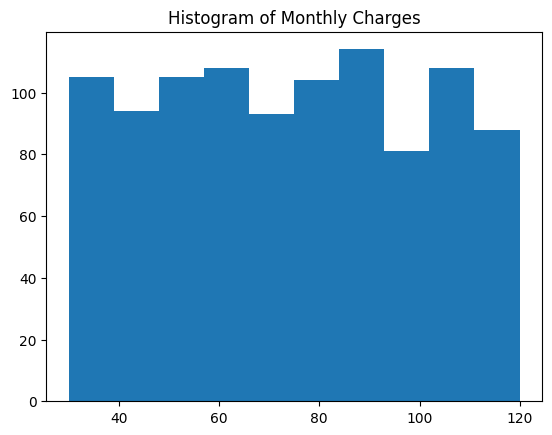

In [21]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

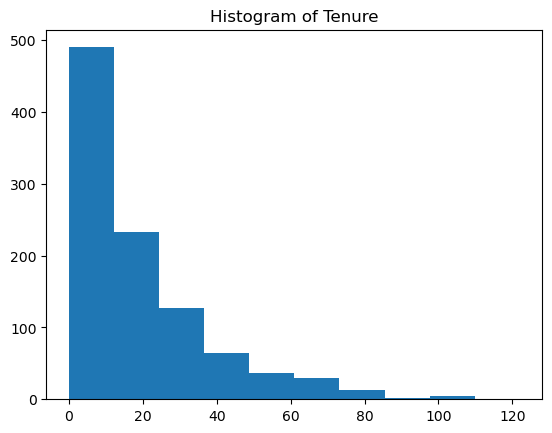

In [22]:
plt.hist(df['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

In [22]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
y=df['Churn']
x=df[['Age','Gender','Tenure','MonthlyCharges']]

In [25]:
x #1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [28]:
x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\samrat mohanta\AppData\Local\Temp\ipykernel_8152\2387561668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [29]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [30]:
type(x['Gender'][0])

numpy.int64

In [31]:
y=y.apply(lambda x:1 if x=="Yes" else 0)
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [33]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [34]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [35]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [87]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [38]:
x_test = scaler.transform(x_test)

In [41]:
# For Know Accuracy Score

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def modelperformance(y_test, predictions):
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print("Model Performance Metrics:")
    print(f"✅ Accuracy Score : {acc:.4f}")
    print(f"✅ Precision Score: {prec:.4f}")
    print(f"✅ Recall Score   : {rec:.4f}")
    print(f"✅ F1 Score       : {f1:.4f}")



In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Using Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression 

In [95]:
log_model=LogisticRegression()

In [96]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [97]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [98]:
y_pred = log_model.predict(x_test)
modelperformance(y_test,y_pred)


Model Performance Metrics:
✅ Accuracy Score : 0.8850
✅ Precision Score: 0.8889
✅ Recall Score   : 0.9944
✅ F1 Score       : 0.9387


In [99]:
# Using KNN Classifier

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
param_grid={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
}

In [102]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [103]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [104]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [105]:
y_pred=gridkn.predict(x_test)

In [106]:
modelperformance(y_test,y_pred)

Model Performance Metrics:
✅ Accuracy Score : 0.8800
✅ Precision Score: 0.8883
✅ Recall Score   : 0.9887
✅ F1 Score       : 0.9358


In [107]:
# Using SVC

In [108]:
from sklearn.svm import SVC

In [109]:
svm =SVC()

In [110]:
param_grid={
    'C':[0.01,0.1,0.5,1],
    'kernel':['linear','rbf','poly']
}

In [111]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [112]:
gridsvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [113]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [114]:
y_pred=gridsvc.predict(x_test)

In [115]:
modelperformance(y_test,y_pred)

Model Performance Metrics:
✅ Accuracy Score : 0.8850
✅ Precision Score: 0.8850
✅ Recall Score   : 1.0000
✅ F1 Score       : 0.9390


In [116]:
# Using Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [119]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [120]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [121]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [122]:
y_pred=grid_tree.predict(x_test)

In [123]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [124]:
modelperformance(y_test,y_pred)

Model Performance Metrics:
✅ Accuracy Score : 0.8550
✅ Precision Score: 0.9157
✅ Recall Score   : 0.9209
✅ F1 Score       : 0.9183


In [125]:
# Using Random Forest 

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()


In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}

grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [128]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [129]:
y_pred=grid_rfc.predict(x_test)

In [130]:
modelperformance(y_test,y_pred)

Model Performance Metrics:
✅ Accuracy Score : 0.8600
✅ Precision Score: 0.8901
✅ Recall Score   : 0.9605
✅ F1 Score       : 0.9239


In [83]:
# Best Model --> SVC

In [84]:
best_model=gridsvc.best_estimator_

In [85]:
joblib.dump(best_model,'model.pkl')

['model.pkl']

In [86]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')